# Dragon real state Price Predictor

In [1]:
import numpy as np
import pandas as pd

In [2]:
housing = pd.read_csv(r"C:\Users\mohdf\OneDrive\Desktop\ML project1\data.csv.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,0.00632,0.00632,0,0.00632,0.00632,0.00632,0.00632,0.00632,0.00632,0.00632,0.00632,0.00632,0.00632
1,0.02731,0.00000,7.07000,0,0.46900,6.42100,78.90000,4.96710,2.00000,242.00000,17.80000,396.90000,9.14000,21.60000
2,0.02729,0.00000,7.07000,0,0.46900,7.18500,61.10000,4.96710,2.00000,242.00000,17.80000,392.83000,4.03000,34.70000
3,0.03237,0.00000,2.18000,0,0.45800,6.99800,45.80000,6.06220,3.00000,222.00000,18.70000,394.63000,2.94000,33.40000
4,0.06905,0.00000,2.18000,0,0.45800,7.14700,54.20000,6.06220,3.00000,222.00000,18.70000,396.90000,5.33000,36.20000


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.00000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.328076,11.132226,0.069170,0.553644,6.27123,68.446060,3.786972,9.547443,407.652186,18.425309,355.889657,12.643234,22.485388
std,8.601545,23.326032,6.866983,0.253994,0.118412,0.75917,28.313061,2.112393,8.709303,169.438710,2.310923,92.643598,7.155053,9.251219
min,0.006320,0.000000,0.006320,0.000000,0.006320,0.00632,0.006320,0.006320,0.006320,0.006320,0.006320,0.006320,0.006320,0.006320
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.88000,44.550000,2.091150,4.000000,279.000000,17.400000,375.240000,6.950000,16.850000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.20200,77.500000,3.190950,5.000000,330.000000,19.050000,391.385000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.62500,94.075000,5.188425,24.000000,666.000000,20.200000,396.210000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

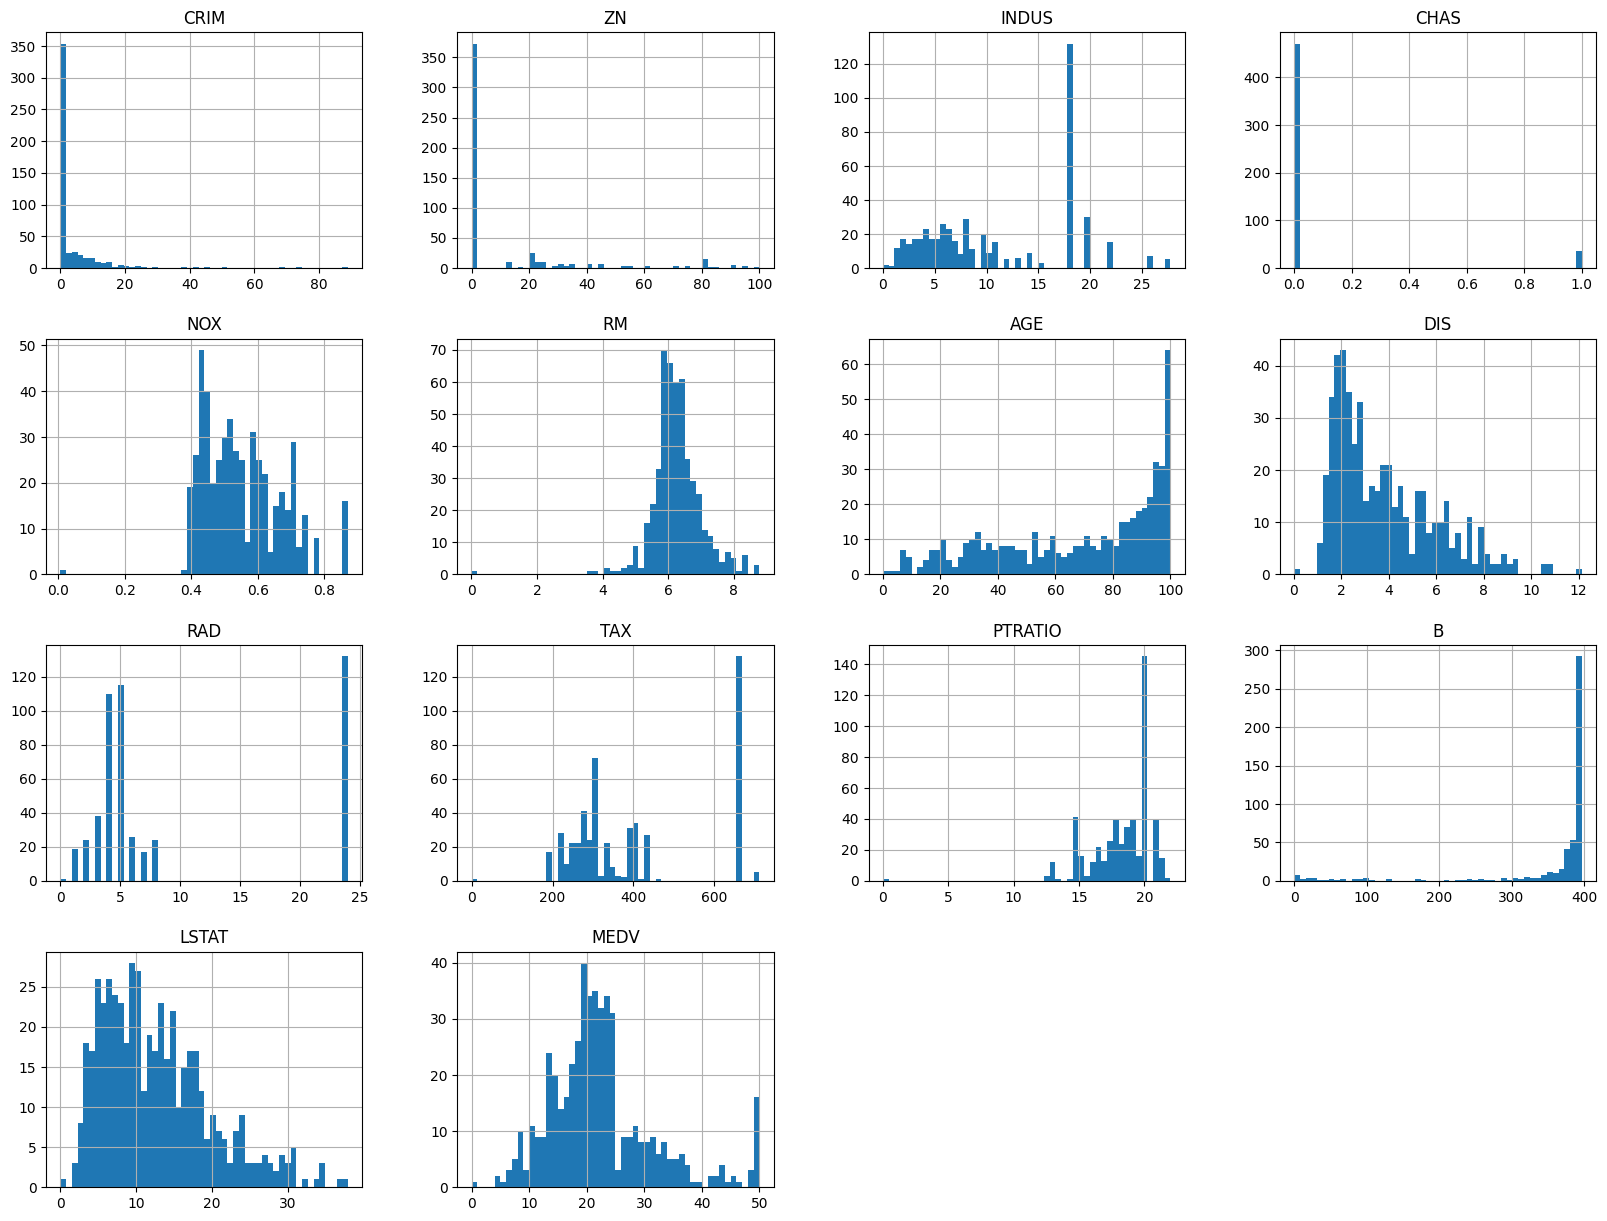

In [9]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

# Train test and Splitting

In [10]:
import numpy as np
# for learning purpose only
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    

In [11]:
#train_set, test_set = split_train_test(housing, 0.2)
print(housing['CHAS'].value_counts())


CHAS
0    471
1     35
Name: count, dtype: int64


In [12]:
#print("Rows in train set",len(train_set))
#print("Rows in test set",len(test_set))

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)
print("Rows in train set",len(train_set))
print("Rows in test set",len(test_set))

Rows in train set 404
Rows in test set 102


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [15]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [16]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [17]:
#95/7

In [18]:
#376/28

In [19]:
housing = strat_train_set.copy()

# Looking for Correlation

In [20]:
corr_matrix = housing.corr()


In [21]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.666876
B          0.374593
ZN         0.340054
DIS        0.248233
CHAS       0.205346
AGE       -0.345060
RAD       -0.364987
NOX       -0.381651
CRIM      -0.388160
PTRATIO   -0.403408
TAX       -0.435813
INDUS     -0.459385
LSTAT     -0.722703
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

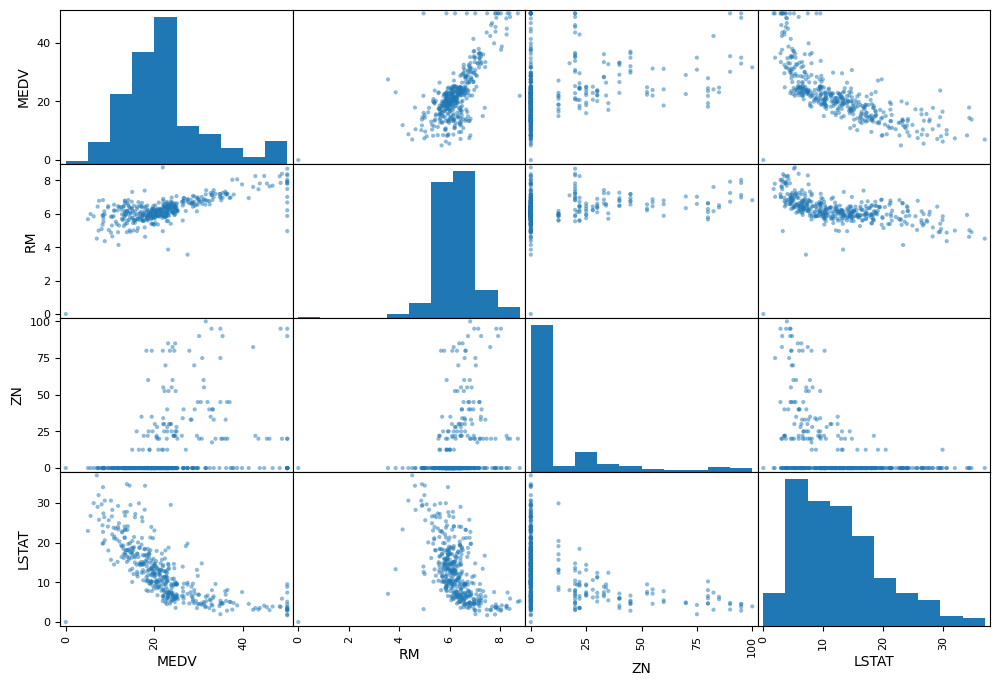

In [22]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

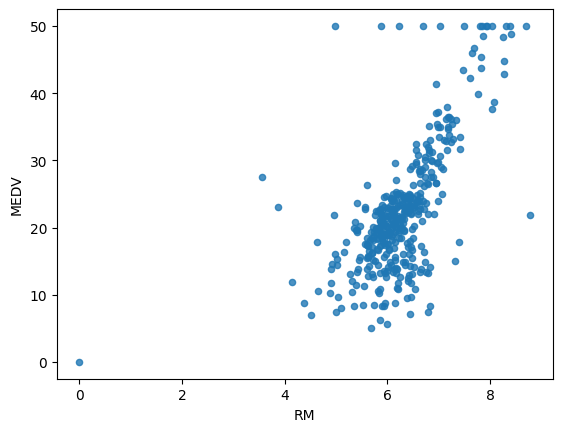

In [23]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

# Trying out Attributes combinations







In [24]:
housing["TAXRM"] = housing['TAX']/housing['RM']


In [25]:
housing["TAXRM"]

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [26]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15,23.0,45.468948


In [27]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.666876
B          0.374593
ZN         0.340054
DIS        0.248233
CHAS       0.205346
AGE       -0.345060
RAD       -0.364987
NOX       -0.381651
CRIM      -0.388160
PTRATIO   -0.403408
TAX       -0.435813
INDUS     -0.459385
TAXRM     -0.509536
LSTAT     -0.722703
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

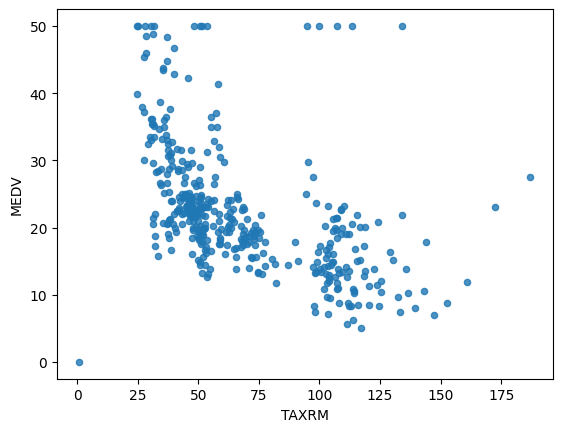

In [28]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [29]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set["MEDV"].copy()

# Missing Attributes

In [30]:
#to take care of msssing attributes, you have three options:
#1. Get rid of the missing data points
#2. Get rid of the whole attributes
# 3. set the values to tghe some values(0, mean or median)

In [31]:
a = housing.dropna(subset=["RM"]) #Option 1


In [32]:
a.shape

(399, 13)

In [33]:
housing.drop("RM", axis=1).shape  # Option 2

(404, 12)

In [34]:
median = housing["RM"].median()   # Compute median for Option 3

In [35]:
housing["RM"].fillna(median)  # Option 3

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [36]:
housing.shape

(404, 13)

In [37]:
housing.describe()  # before starting imputing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.792095,11.339248,0.069307,0.556748,6.263018,68.878481,3.736102,9.732689,411.608927,18.435412,352.410412,12.779298
std,8.099383,22.154286,6.886276,0.254290,0.120052,0.782409,28.465616,2.107214,8.733866,169.818185,2.313758,97.639717,7.253274
min,0.006320,0.000000,0.006320,0.000000,0.006320,0.006320,0.006320,0.006320,0.006320,0.006320,0.006320,0.006320,0.006320
25%,0.086962,0.000000,5.190000,0.000000,0.452000,5.875000,44.225000,2.019025,4.000000,284.000000,17.400000,374.237500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.107300,5.000000,337.000000,19.000000,390.945000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.622500,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [39]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.10730e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90945e+02, 1.15700e+01])

In [40]:
X = imputer.transform(housing)

In [41]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [42]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.792095,11.339248,0.069307,0.556748,6.262350,68.878481,3.736102,9.732689,411.608927,18.435412,352.410412,12.779298
std,8.099383,22.154286,6.886276,0.254290,0.120052,0.777563,28.465616,2.107214,8.733866,169.818185,2.313758,97.639717,7.253274
min,0.006320,0.000000,0.006320,0.000000,0.006320,0.006320,0.006320,0.006320,0.006320,0.006320,0.006320,0.006320,0.006320
25%,0.086962,0.000000,5.190000,0.000000,0.452000,5.877250,44.225000,2.019025,4.000000,284.000000,17.400000,374.237500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.107300,5.000000,337.000000,19.000000,390.945000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.622500,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Scikit_Learn Design

# Craeting a Pipeline

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    #    .....add as many as you want in your pipeline.
    ('std_scaler',StandardScaler()),
])

In [44]:
housing_num_tr = my_pipeline.fit_transform(housing)


In [45]:
housing_num_tr.shape

(404, 13)

# Selecting a desired model for Dragon Real Estates

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [47]:
some_data = housing.iloc[:5]


In [48]:
some_labels = housing_labels.iloc[:5]

In [49]:
prepared_data = my_pipeline.transform(some_data)

In [50]:
model.predict(prepared_data)

array([22.349, 25.752, 16.617, 23.326, 23.575])

In [51]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating the model

In [52]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [53]:
rmse

1.4671832327533634

# Using better evaluation techniques - Cross Validation

In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)

In [55]:
rmse_scores

array([2.78709428, 6.81023373, 4.22636344, 2.817212  , 3.68446607,
       2.61283728, 5.4895133 , 3.3094482 , 3.42832129, 3.45794673])

In [56]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation :",scores.std())

In [57]:
print_scores(rmse_scores)

Scores: [2.78709428 6.81023373 4.22636344 2.817212   3.68446607 2.61283728
 5.4895133  3.3094482  3.42832129 3.45794673]
Mean: 3.86234363196467
Standard Deviation : 1.2636938324388187


# Saving the model

In [58]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

# Testing the model on test data

In [65]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
#print(final_predictions, list(Y_test))

In [62]:
final_rmse

3.0299872678784636

In [66]:
prepared_data[0]

array([-0.43942006,  3.12777928, -1.11944326, -0.27288841, -1.37400695,
       -0.19875066, -1.29715119,  2.60580917, -1.00110501, -0.56960163,
       -0.88079023,  0.41509522, -0.85712979])

# Using the model

In [67]:
import numpy as np
from joblib import dump, load
model = load('Dragon.joblib')
features = np.array([-0.43942006,  3.12777928, -1.11944326, -0.27288841, -1.37400695,
       -0.19875066, -1.29715119,  2.60580917, -1.00110501, -0.56960163,
       -0.88079023,  0.41509522, -0.85712979])
model.predict([features])

array([22.349])